# EDA , FE and Linear Regression Models (Algerian Forest Fire Data)

## Abhishek Kumar Singh



### 1. EDA and FE
1. Data Profiling
2. Stats Analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Encoding
6. Data Scaling

### 2. Regression Model
1. Logistic Regression
**Dataset**
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#


## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely notfire and Fire

###  Problem Statement
1. To predict Temperature of region where fire is occuring 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns' , None)

# 1.0 Importing Dataset and cleaning

In [2]:
##reading csv file
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.iloc[121:,:].head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


### 1.1 Dropping Rows Having No Information

In [5]:
## index 122, 123 shoul be removed
df = data.copy()

df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

df.iloc[121:].head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


### 1.2 Creating region Column

In [6]:
## Creating feature Region 0 for Bejaia and 1 for Sid Bel-abbes
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

df.iloc[120:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


### 1.3 DataTypes and Describe

In [7]:
## Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [8]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244.000000
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,NaN
top,15,08,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### 1.4 DataCleaning

In [10]:
## Some Column Names Have spaces in their names
df.columns = [col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
## Converting All Features values to string to clean spaces
df =df.astype(str)

In [12]:
for feature in df.iloc[:,7:15].columns:
    df[feature] = df[feature].str.replace(' ','')

In [13]:
##checking for Classes Columns
df['Classes'].value_counts()

fire       137
notfire    106
nan          1
Name: Classes, dtype: int64

In [14]:
##replacing nan value of Classes with fire
df[df['Classes']=='nan'].index

Int64Index([165], dtype='int64')

In [15]:
df.loc[165,'Classes'] = 'fire'

In [16]:
df['Classes'].value_counts()

fire       138
notfire    106
Name: Classes, dtype: int64

In [17]:
##Checking for FWI column
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

In [18]:
## replacing fire value in FWI feature with its mode
df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [19]:
df.loc[165,'FWI'] = '0.4'

In [20]:
##Encoding Classes Feature
df['Classes'] = df['Classes'].str.replace('notfire','0')
df['Classes'] = df['Classes'].str.replace('fire','1')

### 1.5 Changing Datatypes

In [21]:
## changing datatypes of features 
convert_dict = {'Temperature': float,
                'RH': int,
                'Ws':int,
                'Rain':float,
                'FFMC':float,
                'DMC':float,
                'DC':float,
                'ISI':float,
                'BUI':float,
                'FWI':float,
                'day':int,
                'month':int,
                'year':int,
                'Classes':int,
                'Region':float
               }
 

In [22]:
df =df.astype(convert_dict)
df.dtypes

day              int32
month            int32
year             int32
Temperature    float64
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region         float64
dtype: object

In [23]:
df.shape

(244, 15)

### 1.6 Checking For Null Values

In [24]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### Insight
1. There are no Null Values
2. There are 244 rows and 15 columns

# 2.0 Numerical and Categorical Features

### 2.1 Categorical Features

In [25]:
cat_features = [feat for feat in df.columns if df[feat].dtype == 'O']

In [26]:
for feature in cat_features:
    print(df.groupby(feature)['Region'].value_counts())

<AxesSubplot: xlabel='Classes', ylabel='count'>

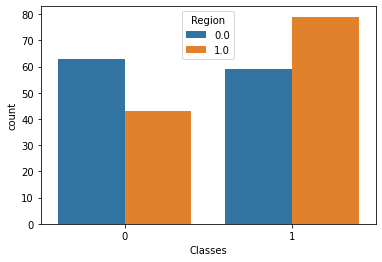

In [27]:
sns.countplot(data=df,x='Classes',hue='Region')

### Insight
1. Sidi Bel-abbes has more occurance of fire

### 2.2 Numerical Features

In [28]:
num_feature = [col for col in df.columns if df[col].dtype != 'O']

In [29]:
df[num_feature].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

### 2.3 Segregating Discrete And Continuos Features

### 2.3.1 Discrete

In [30]:
## We are assuming 32 as threshols were feature having less than thdreshold is Discrete
disc_feat = [feat for feat in num_feature if len(df[feat].unique())<32]

disc_feat

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

### 2.3.1.1 Discrete vs Target

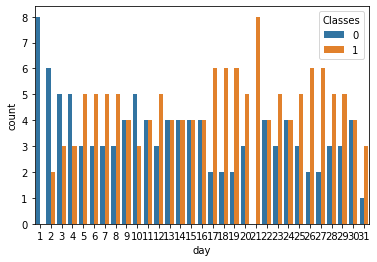

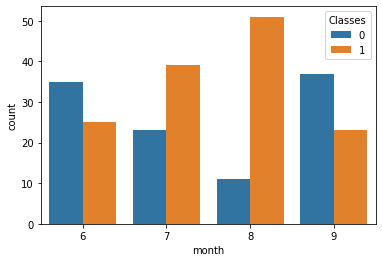

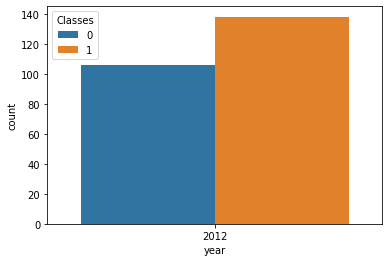

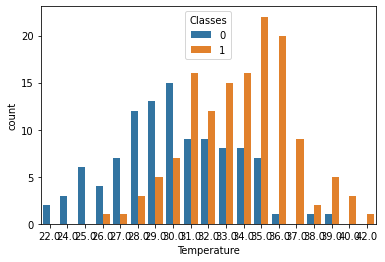

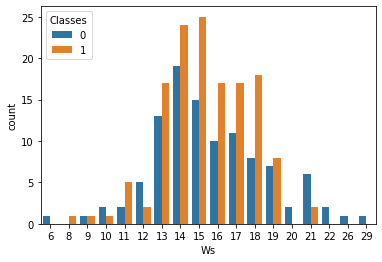

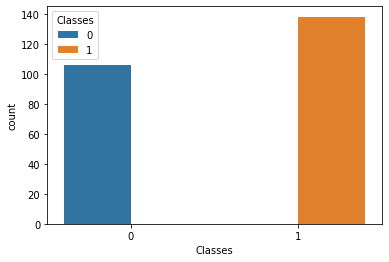

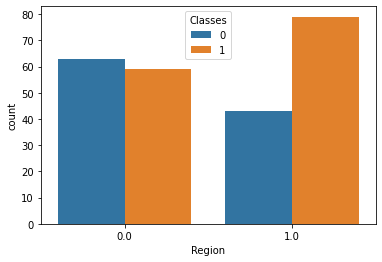

In [31]:
for feature in disc_feat:
    sns.countplot(data=df,x=feature,hue='Classes')
    plt.show()

#### Insights
1. July and August months have More cases of fire than no fire
2. August has Highest No of fire cases
3. Overall No of Fire cases are more than No fire
4. Temperature Bewteen 30 to 40 has more no of occirance of fire
5. WindSpeed between 13 -19 has more occurance of fire
6. Bejaia region has less no of occurance of fire than No fire
7. Sidi Bel-abbes has more no of occurance of fire case than no fire
8. Sidi Bel-abbes has more no of ocurrance of fire than in region Bejaia

### 2.3.2 Continuous Num Features

In [32]:
cont_features = [feature for feature in num_feature if feature not in disc_feat]
cont_features

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

### 2.3.2.1 Distribution of Continuous Num Features

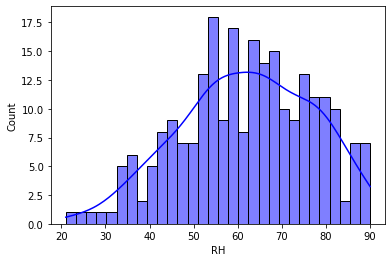

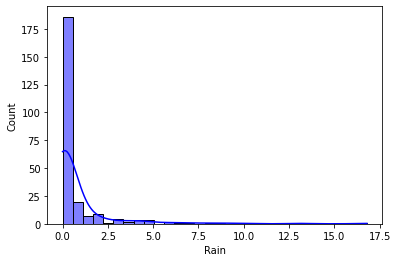

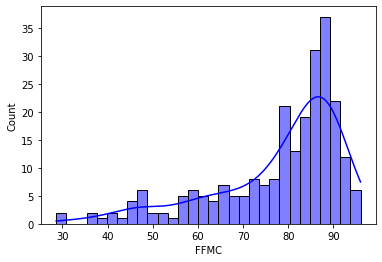

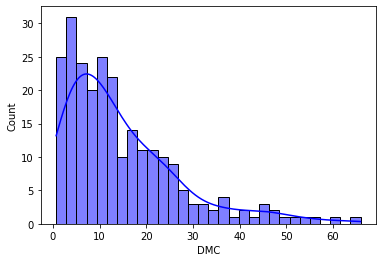

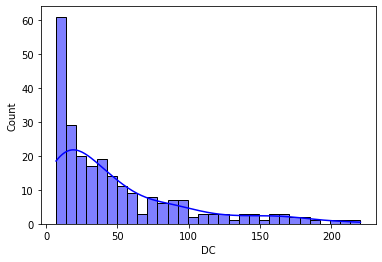

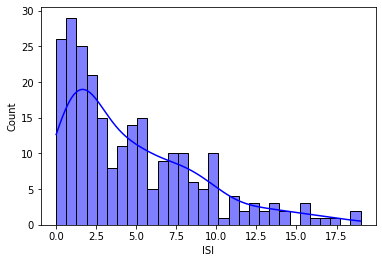

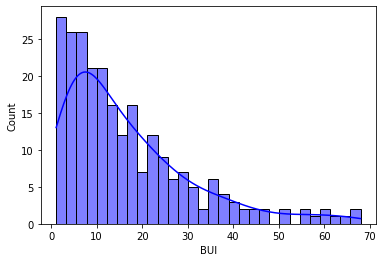

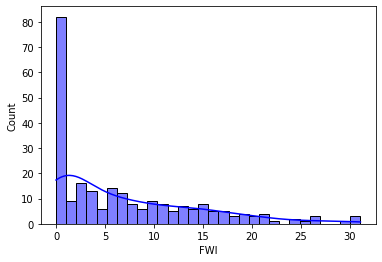

In [33]:
## Checking distribution of continuous numerical features

for feature in cont_features:
    sns.histplot(data=df,x=feature,kde=True,bins=30,color='blue')
    plt.show()

### Insights
1. Rain,DMC,DC,ISI,BUI,FWI following log normal Dist.
2. FFMC follows left skewd dist.
3. RH somehow Following Gaussian Distribution

### 2.4 Checking for outliers

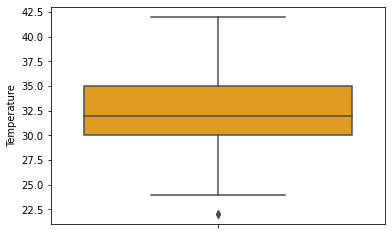

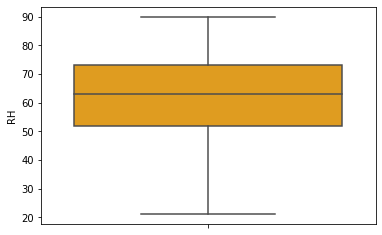

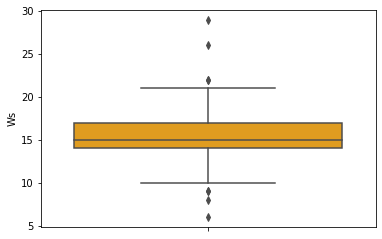

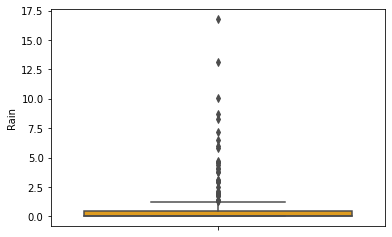

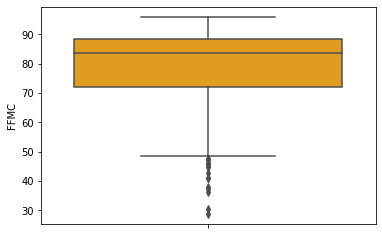

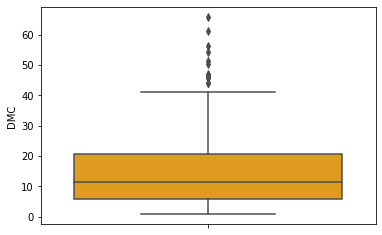

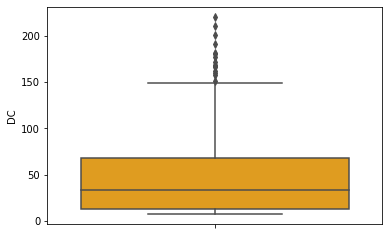

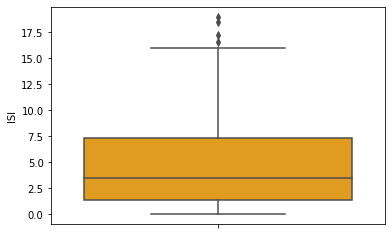

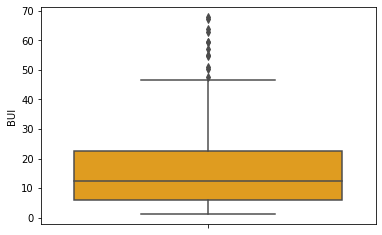

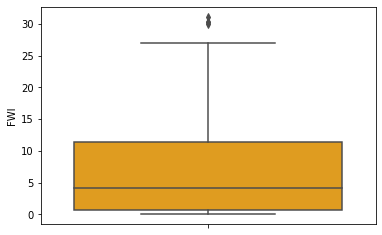

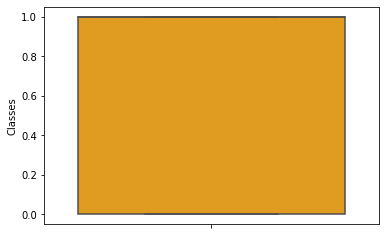

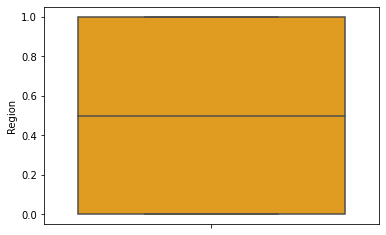

In [34]:
for feature in  [ feature for feature in num_feature if feature not in ['day','month','year']]:
    sns.boxplot(data=df,y=feature,color='orange')
    plt.show()

### Insights
1. Temperature , FFMC have outlier in lower boundary
2. WindSpeed , Ws has outliers on both boundaries
3. Rain, DMC,DC,ISI,BUI and FWI have outliers on upper boundary

### 3.0 Correlation between Num Features

In [35]:
data_corr = round(df[[feature for feature in num_feature if feature if feature not in ['day','month','year']]].corr(),2)
data_corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52,0.27
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44,-0.41
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07,-0.18
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38,-0.04
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77,0.22
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58,0.19
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51,-0.08
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74,0.27
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58,0.09
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71,0.19


### 3.1 Heatmap for Correlation

<AxesSubplot: >

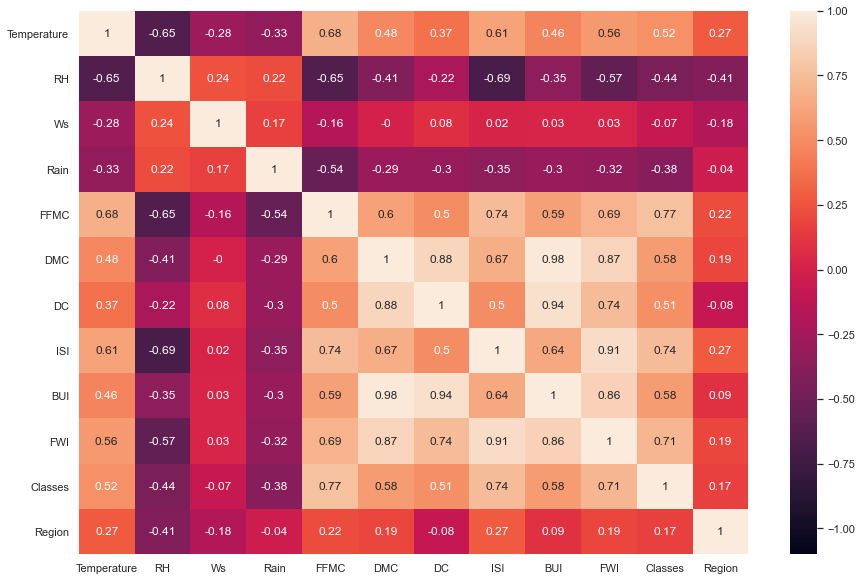

In [36]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data_corr,annot=True,vmax=-1,vmin=1)

### Insights
1. DMC-BUI , DC-BUI , ISI-FWI are Highly correlated(more tahn 0.9)
2. FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI are highly correlated

### 4.0 Feature vs Target

### 4.1 Relation Plot Rain v/s Temperature

<Figure size 1440x1080 with 0 Axes>

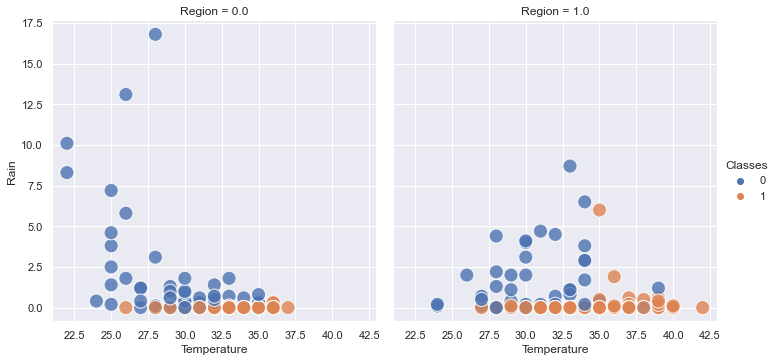

In [37]:
plt.figure(figsize=(20,15))
plt.suptitle('Relation Plots',fontsize=20,fontweight='bold')


sns.relplot(data=df, x="Temperature", y="Rain", hue="Classes",col='Region',s=200,alpha=0.8)

### Insight
1. Most Fire Cases are above 30 degree temperature
2. Less Rain has more Occurance of fire

### 4.2 Scatter Between ISI v/s BUI , ISI v/s Rain

(0.0, 5.0)

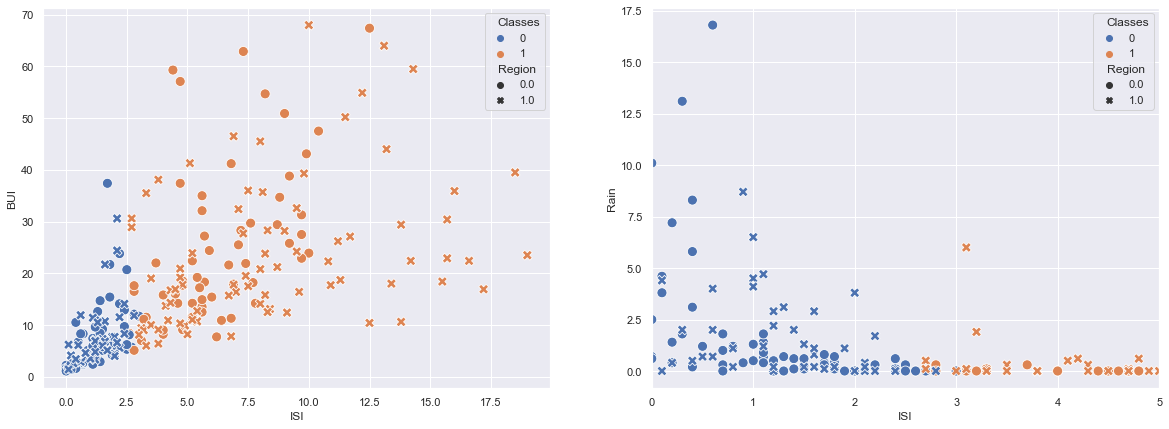

In [38]:
fig,axes=plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(ax=axes[0],data=df,x='ISI',y='BUI',hue='Classes',style='Region',s=100)
plt.xlim(0,5)

sns.scatterplot(ax=axes[1],data=df,x='ISI',y='Rain',hue='Classes',style='Region',s=100)
plt.xlim(0,5)

### Insight
1. There is almost All Occurance of fire when ISI > 3 and BUI >5

### 4.3 DMC v/s DC Scatterplot

<AxesSubplot: xlabel='DMC', ylabel='DC'>

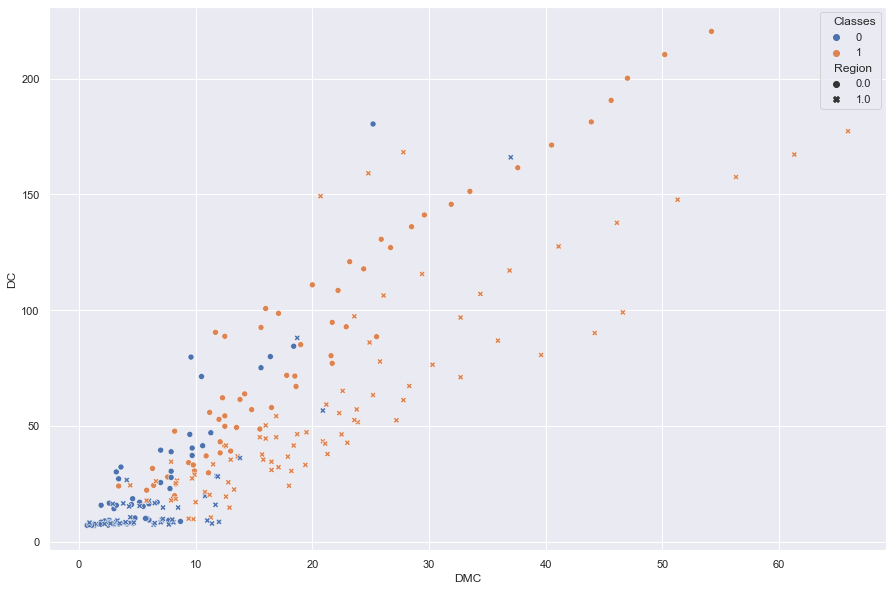

In [39]:
sns.scatterplot(data=df,x='DMC',y='DC',hue='Classes',style='Region')

### Insight
1. DC>100 and DMC > 30 have all cases of occurance of fire

### 4.4 month

<AxesSubplot: xlabel='month', ylabel='Region'>

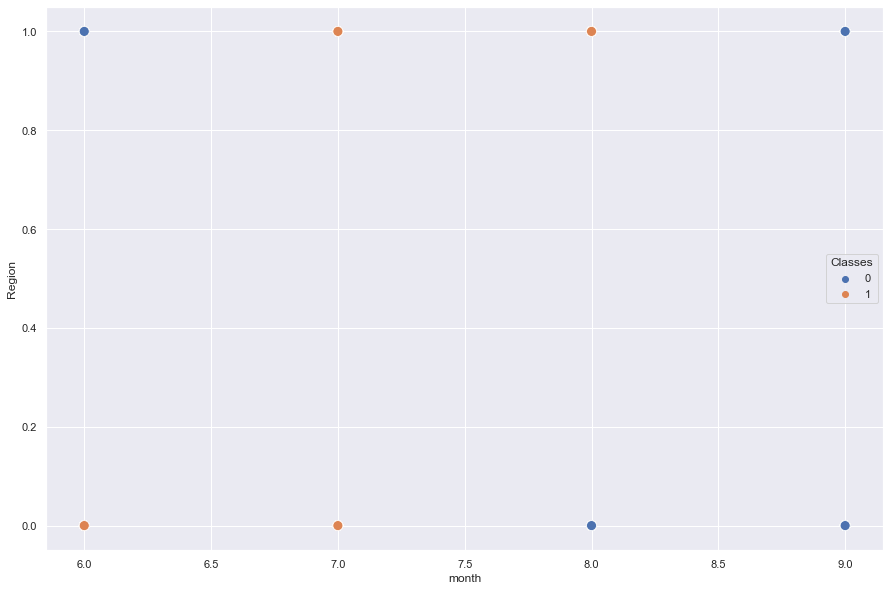

In [40]:
sns.scatterplot(data=df,x='month',y='Region',hue='Classes',s=100)

### Insight
1. Most No of fire cases are in july and august
2. June and September has less nor of fire cases

### 4.5 region

<AxesSubplot: xlabel='Region', ylabel='Temperature'>

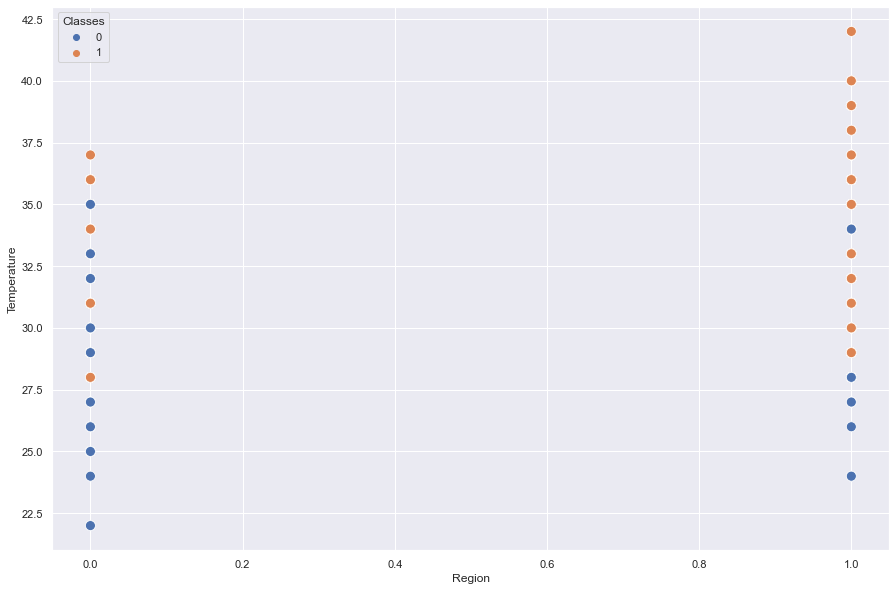

In [41]:
sns.scatterplot(data=df,x='Region',y='Temperature',hue='Classes',s=100)

### Insights
1. Bejaia has less no of fire occurance cases than no fire occurance
2. More no of fire occure=ance in Sidi Bel-abbes as compared to Bejaia

# Final Report
1. Very Highly Correlated features: DMC-BUI, DC-DMC, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
3. Temperature Between 30-40 have most no of fire occurance
4. WindSpeed betwwen 13-19 have more no of fire occurances
5. Almost all cases of firer occurance have rainfall less tham 1mm
6. for FFMC greater than 80, almost all cases of fire is reported
7. DMC>30 and DC>100 have all cases of fire occurance i.e drought affected area are more prone to fire
8. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
9. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
10. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
11. August and July have more no of fire occurance
12. Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.

### Note
**Temperature is Dependent Feature**

In [42]:
##dropping year column
df.drop('year',axis=1,inplace=True)

# Model Building Prep

### 1.0 Segregate Independent and dependent features

In [43]:
X = df.drop('Classes',axis=1)
y = df.Classes

In [44]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [45]:
y.sample(5)

87     1
82     1
221    1
45     0
85     1
Name: Classes, dtype: int32

### 2.0 Splitting Data into Training and Testing

In [46]:
## importing train_test_split
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [48]:
X_train.shape,y_train.shape

((170, 13), (170,))

In [49]:
X_test.shape,y_test.shape

((74, 13), (74,))

### 3.0 Feature Engineering

### 3.1 Standadization/Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
## creating StandarScaler object
scaler = StandardScaler()
scaler

StandardScaler()

In [52]:
##using fit_transform to standardize the train data
X_train = scaler.fit_transform(X_train)

In [53]:
##using transform to scale Test Data to Avoid Data Leakge
X_test = scaler.transform(X_test)

### 4.0 Model Building

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_reg = LogisticRegression()

In [56]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [57]:
print('-->  Coefficients are {}'.format(log_reg.coef_ ))
print('--> Intercept is {}'.format(log_reg.intercept_))

-->  Coefficients are [[-1.05808903e-01  1.74361390e-03  5.17397154e-02  1.34434728e-01
  -2.18558145e-01 -3.57550894e-01  2.30016295e+00 -1.88798077e-01
  -2.34643009e-02  2.28251754e+00  3.38979980e-01  1.81155427e+00
  -1.42193583e-03]]
--> Intercept is [0.99680935]


### 1.1 Prediction of Data

In [58]:
y_pred = log_reg.predict(X_test)

### 1.2 Validation of Logistic Regression Model

### 1.2.1 Accuracy

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.972972972972973


### 1.2.2 Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27,  0],
       [ 2, 45]], dtype=int64)

<AxesSubplot: >

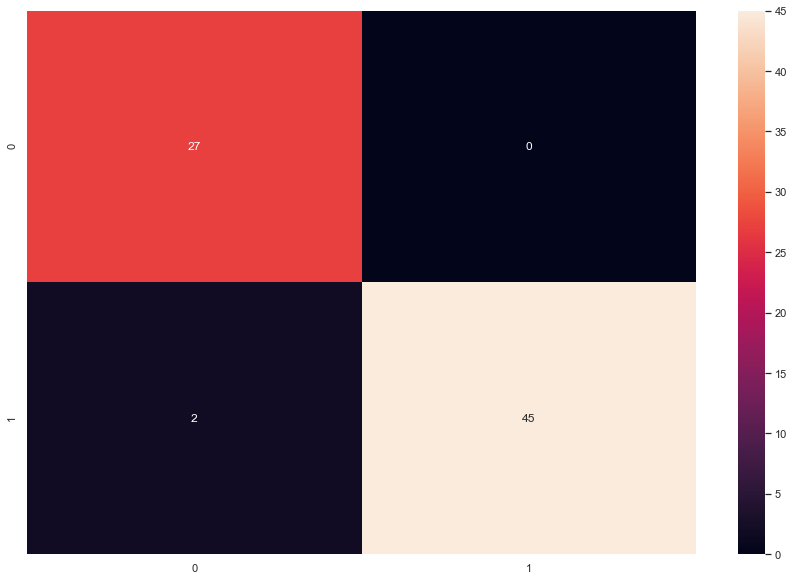

In [61]:
sns.heatmap(conf_mat,annot=True)

### 1.2.3 Precision , Recall , F1 Score

In [62]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [63]:
Accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
Accuracy

0.972972972972973

In [64]:
# Precision
Precision = true_positive/(true_positive + false_positive)
Precision

1.0

In [65]:
## Recall
Recall = true_positive / (true_positive + false_negative)
Recall

0.9310344827586207

### 5.0 Model Saving

In [66]:
import pickle
with open('model_logistic_algeria.pkl','wb') as f:
    pickle.dump(log_reg,f)